<h1 align="center"> Hardware Vendor used by IXP Participants  </h1>

Author:

    - Joao M. Ceron (SIDNLabs)

In [9]:
from copy import deepcopy
from pywaffle import Waffle
import csv
import glob
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os
import pandas as pd
import pyasn
import re
import seaborn as sns
import sys

sns.set(style="ticks", color_codes=True)
plt.style.use('default')
from IPython.core.display import display, HTML
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Subrotines

In [10]:
## Find the TOP "N" the remains are summarized as "others" 
def top_n_dataframe(n,dataframe_field):
    
    top_n = n
    field_name = dataframe_field.name
    top  = dataframe_field.value_counts()[:top_n].to_frame().reset_index()

    new_row = pd.DataFrame(data = {
        'count' : [ dataframe_field.value_counts()[top_n:].sum()],
        field_name : ['others'],
    })

    top.columns = [field_name, 'count']
    top.set_index([field_name]).reset_index()
    top_result = pd.concat([top, new_row],sort=False)
    
    # percentage field
    df = top_result.groupby(field_name).sum() 
    df=df.sort_values(by="count", ascending=False)
    df['percent'] = df.transform(lambda x: (x/np.sum(x)*100))
    df['percent'] = df['percent'].round(2)
    return (df)

In [11]:
def init_fig():
    
    fig = plt.figure(figsize=(8, 4))
    ax = plt.subplot(111)   
    ax = plt.subplot2grid((1,1), (0,0))
    
    # style
    ax.set_facecolor("#ffffffff")
    
    return (fig,ax)

In [12]:
def ixp_name_rewrite(filename):
        if re.match(r"arp.*flix.*translated", file):
            title = "FLIX - Florida - USA"
        elif re.match(r"arp.*londrina.*", file):
            title = "IXP.br - PR2 - BR"
        elif re.match(r"arp.*poa.*", file):
            title = "IXP.br - RS - BR"
        elif re.match(r"arp.*pr.*", file):
            title = "IXP.br - PR1 - BR"
        elif re.match(r"arp.*ixp_sp.*", file):
            title = "IXP.br - SP - BR"
        elif re.match(r"arp.*linx.*", file):
            title = "LINX - UK"
        elif re.match(r"arp.*speed.*", file):
            title = "Speed-IX - NL"
        elif re.match(r"arp.msk-ix.txt-translated", file):
            title = "MSK-IX - Moscow - RU"    
        elif re.match(r"arp.France-IX.txt", file):
            title = "France-IX - FR"
        elif re.match(r"arp.*asteroid.*translated", file):
            title = "Asteroid IXP - NL"
        elif re.match(r"arp.*nlix.*translated", file):
            title = "NL-IX - NL"
        elif re.match(r"arp.*bangkok.*translated", file):
            title = "BKNIX - Bangkok - TH"
        elif re.match(r"arp.*brisbane.*translated", file):
            title = "EDGEIX - Brisbane - AU"  
        elif re.match(r"arp.decix.txt", file):
            title = "DE-CIX - All Locations"
        elif re.match(r"arp.Denver-IX.txt", file):
            title = "Denver-IX - USA"
        elif re.match(r"arp.KleyReX.txt", file):
            title = "KleyReX - DE"
        elif re.match(r"arp.SwissIX.txt", file):
            title = "SwissIX - CH"
        elif re.match(r"arp.EPIX.txt", file):
            title = "EPIX Warsaw - PL"
        elif re.match(r"arp.BCIX.txt", file):
            title = "Berlin IXP - DE"
        elif re.match(r"arp.LONAP.txt", file):
            title = "LONAP - UK"   
        elif re.match(r"arp.IX-SYD.txt", file):
            title = "Sydnei - AU"
        elif re.match(r"arp.NAPAfrica.txt", file):
            title = "NAPAfrica - All Locations"
        elif re.match(r"arp.GR-IX.txt", file):
            title = "Greek IXP - GR"
        elif re.match(r"arp.LINX.txt", file):
            title = "LINX - UK" 
        elif re.match(r"arp.STHIX.txt", file):
            title = "STHIX - Stockholm - SE"                     
        elif re.match(r"arp.inex*", file):
            title = "INEX - IE"
        else:
            title = file
        return (title)

In [13]:
def plot_graph(field, title):
    (fig,ax) = init_fig()
    field.plot(kind="bar", ax=ax)
    ax.set_xlabel('MAC address vendor')
    ax.set_ylabel('# percent of devices')
    ax.xaxis.label.set_color('grey')
    ax.yaxis.grid(color='grey', linestyle='dotted', linewidth=0.5)
    ax.set_title(title);

    ax.set_ylim(bottom=0, top=50)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

# MAIN

### load MAC database translation

In [14]:
# mac_address_manufacturer 
df_mac_all = pd.read_csv("./dataset/macaddress.io-db.csv.gz", low_memory=False).dropna()
df_mac_all.head(1)

,oui,isPrivate,companyName,companyAddress,countryCode,assignmentBlockSize,dateCreated,dateUpdated
0,00:E0:0D,0,Radiant Systems,1000 ALDERMAN DR. ALPHARETTA GA 30202 US,US,MA-L,1980-01-01,2015-09-27


### load arp files

arp.STHIX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.STHIX.txt
                                    count  percent
companyName                                       
VMware, Inc                            70    33.65
Juniper Networks                       43    20.67
Cisco Systems, Inc                     38    18.27
Arista Networks                        13     6.25
Super Micro Computer, Inc              11     5.29
Brocade Communications Systems Llc      6     2.88
Huawei Tech Co, Ltd                     6     2.88
Routerboard.com                         5     2.40
Icann, Iana Department                  4     1.92
Dell Inc                                3     1.44
Intel Corp                              3     1.44
others                                  2     0.96
Extreme Networks, Inc                   1     0.48
Hewlett Packard Enterprise              1     0.48
J125, National Security Agency          1     0.48
TiMetra Networks                        1     0.48


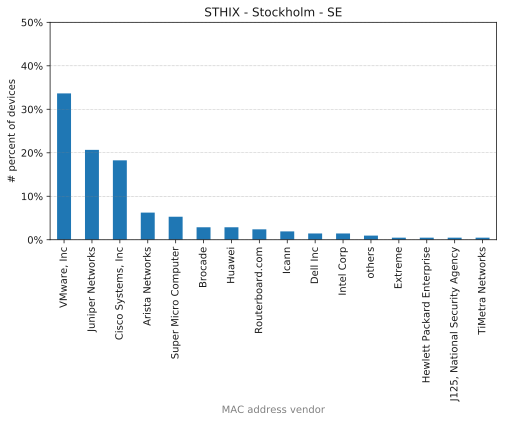

arp.msk-ix.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.msk-ix.txt-translated
                                    count  percent
companyName                                       
Cisco Systems, Inc                    155    48.90
Juniper Networks                       80    25.24
Huawei Tech Co, Ltd                    25     7.89
others                                 15     4.73
Intel Corp                             10     3.15
Brocade Communications Systems Llc      5     1.58
Hewlett Packard                         5     1.58
Routerboard.com                         5     1.58
Arista Networks                         4     1.26
Alcatel-Lucent Ipd                      3     0.95
Super Micro Computer, Inc               3     0.95
Nokia                                   2     0.63
VMware, Inc                             2     0.63
Camille Bauer                           1     0.32
Ericsson                                1     0.32
Extreme Networks, Inc                   1     

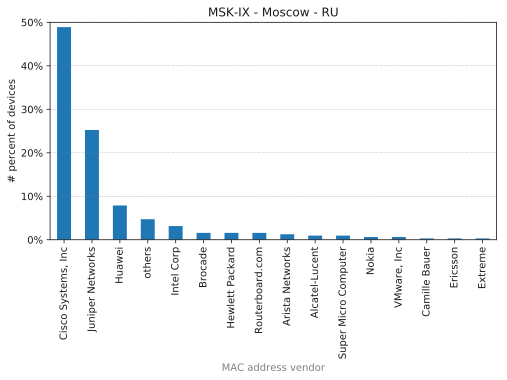

arp.BKNIX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.BKNIX.txt
                        count  percent
companyName                           
Cisco Systems, Inc         20    36.36
Juniper Networks           14    25.45
Digital Equipment Corp      7    12.73
Huawei Tech Co, Ltd         4     7.27
VMware, Inc                 4     7.27
Arista Networks             1     1.82
Dell Inc                    1     1.82
Force10 Networks, Inc       1     1.82
Fortinet Inc                1     1.82
Intel Corp                  1     1.82
Jetcell, Inc                1     1.82
others                      0     0.00


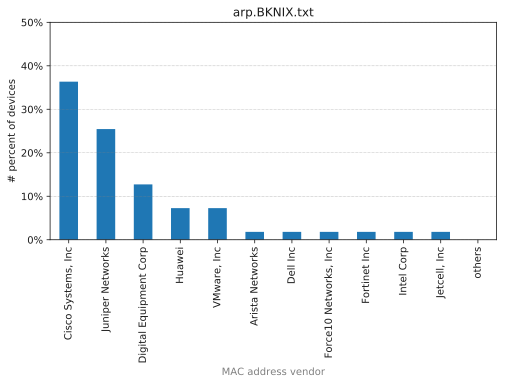

arp.flix.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.flix.txt-translated
                                    count  percent
companyName                                       
Juniper Networks                      134    42.68
Cisco Systems, Inc                     79    25.16
Arista Networks                        30     9.55
Brocade Communications Systems Llc     15     4.78
Routerboard.com                        13     4.14
Intel Corp                             12     3.82
VMware, Inc                            11     3.50
Icann, Iana Department                  6     1.91
Nokia                                   5     1.59
Broadcom                                3     0.96
Dell Inc                                3     0.96
Extreme Networks, Inc                   2     0.64
HotLava Systems, Inc                    1     0.32
others                                  0     0.00


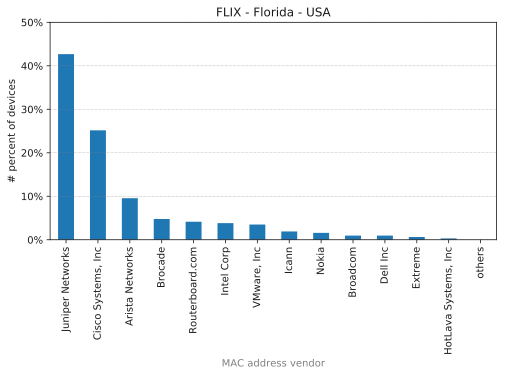

arp.LINX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.LINX.txt
                                    count  percent
companyName                                       
Juniper Networks                      554    38.90
Cisco Systems, Inc                    520    36.52
Arista Networks                        55     3.86
Routerboard.com                        55     3.86
Huawei Tech Co, Ltd                    44     3.09
Brocade Communications Systems Llc     37     2.60
others                                 34     2.39
Intel Corp                             24     1.69
Super Micro Computer, Inc              20     1.40
Nokia                                  18     1.26
Alcatel-Lucent Ipd                     17     1.19
Extreme Networks, Inc                  14     0.98
Dell Inc                                9     0.63
VMware, Inc                             9     0.63
Ubiquiti Networks Inc                   8     0.56
Edgecore Networks Corp                  6     0.42


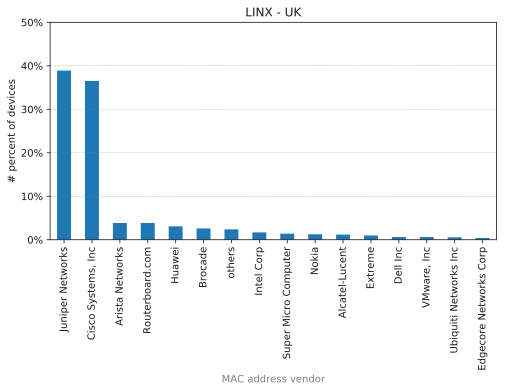

arp.GR-IX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.GR-IX.txt
                                  count  percent
companyName                                     
Cisco Systems, Inc                   17    39.53
Juniper Networks                     10    23.26
Arista Networks                       4     9.30
Routerboard.com                       4     9.30
Lockheed Martin Tactical Systems      2     4.65
Dell Inc                              1     2.33
Extreme Networks, Inc                 1     2.33
Icann, Iana Department                1     2.33
Ieee Registration Authority           1     2.33
VMware, Inc                           1     2.33
Wistron Corp                          1     2.33
others                                0     0.00


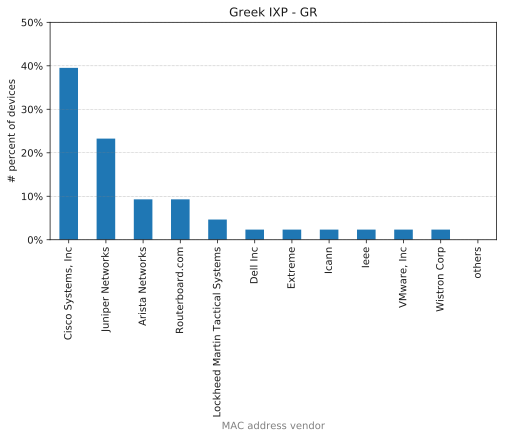

arp.decix.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.decix.txt-translated
                                    count  percent
companyName                                       
Juniper Networks                     3477    41.56
Cisco Systems, Inc                   2594    31.00
Routerboard.com                       398     4.76
Arista Networks                       294     3.51
others                                258     3.08
Huawei Tech Co, Ltd                   252     3.01
Brocade Communications Systems Llc    214     2.56
Super Micro Computer, Inc             142     1.70
VMware, Inc                           124     1.48
Nokia                                 110     1.31
Hewlett Packard                       104     1.24
Intel Corp                             96     1.15
Extreme Networks, Inc                  92     1.10
Mellanox Tech, Inc                     92     1.10
Dell Inc                               64     0.76
Xerox Corp                             56     0

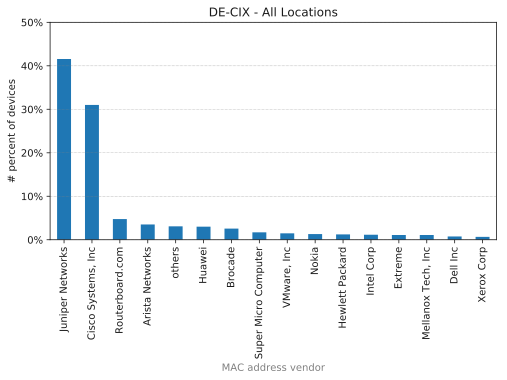

arp.France-IX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.France-IX.txt
                                    count  percent
companyName                                       
Cisco Systems, Inc                    147    40.05
Juniper Networks                      105    28.61
Brocade Communications Systems Llc     30     8.17
others                                 16     4.36
Arista Networks                        13     3.54
Intel Corp                             12     3.27
Routerboard.com                        11     3.00
Huawei Tech Co, Ltd                     6     1.63
Dell Inc                                5     1.36
VMware, Inc                             5     1.36
Nokia                                   4     1.09
Ubiquiti Networks Inc                   4     1.09
zte Corp                                3     0.82
Alcatel-Lucent Ipd                      2     0.54
Hewlett Packard Enterprise              2     0.54
Super Micro Computer, Inc               2     0.54


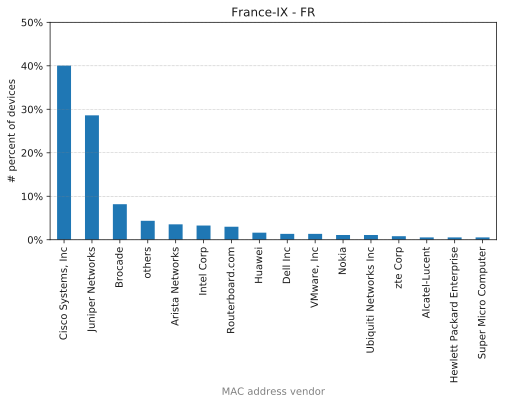

arp.ixp_londrina.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.ixp_londrina.txt-translated
                                                    count  percent
companyName                                                       
Huawei Tech Co, Ltd                                     9    24.32
Routerboard.com                                         8    21.62
Cisco Systems, Inc                                      5    13.51
Juniper Networks                                        5    13.51
Dell Inc                                                3     8.11
Ericsson                                                2     5.41
Alcatel-Lucent Ipd                                      1     2.70
Broadcom                                                1     2.70
Fortinet Inc                                            1     2.70
Intel Corp                                              1     2.70
Nic.br- Nucleo de Informacao e Coordenacao do P...      1     2.70
others                              

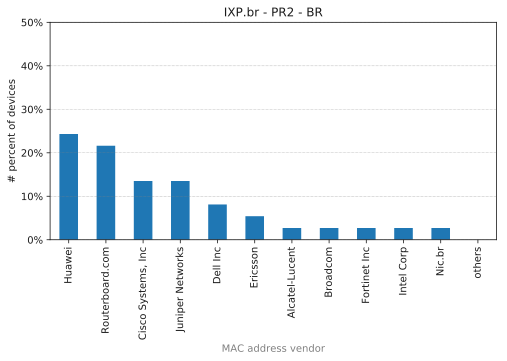

arp.NAPAfrica.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.NAPAfrica.txt
                                    count  percent
companyName                                       
Routerboard.com                       317    42.27
Cisco Systems, Inc                    172    22.93
Juniper Networks                      146    19.47
Arista Networks                        39     5.20
Huawei Tech Co, Ltd                    31     4.13
Super Micro Computer, Inc              10     1.33
others                                  8     1.07
VMware, Inc                             5     0.67
Extreme Networks, Inc                   4     0.53
Intel Corp                              4     0.53
Microsoft Corp                          3     0.40
Palo Alto Networks                      3     0.40
Alcatel-Lucent Ipd                      2     0.27
Brocade Communications Systems Llc      2     0.27
Nokia                                   2     0.27
Ubiquiti Networks Inc                   2     0.27


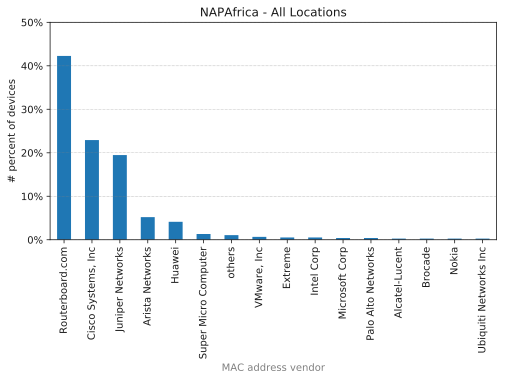

arp.speed.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.speed.txt-translated
                                    count  percent
companyName                                       
Juniper Networks                       42    33.07
Cisco Systems, Inc                     22    17.32
Routerboard.com                        11     8.66
Huawei Tech Co, Ltd                     9     7.09
Arista Networks                         8     6.30
Brocade Communications Systems Llc      8     6.30
Intel Corp                              6     4.72
VMware, Inc                             6     4.72
Extreme Networks, Inc                   3     2.36
Dell Inc                                2     1.57
Hewlett Packard                         2     1.57
Mellanox Tech, Inc                      2     1.57
Super Micro Computer, Inc               2     1.57
others                                  2     1.57
J125, National Security Agency          1     0.79
Sunrich Tech Ltd                        1     0

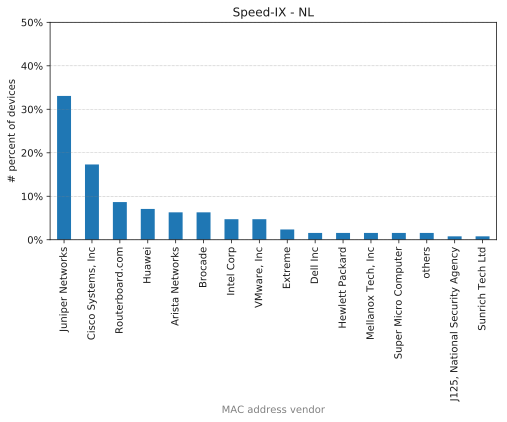

arp.ixp_pr.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.ixp_pr.txt-translated
                                                    count  percent
companyName                                                       
Huawei Tech Co, Ltd                                    48    30.00
Juniper Networks                                       35    21.88
Routerboard.com                                        27    16.88
Cisco Systems, Inc                                     14     8.75
Dell Inc                                                9     5.62
Intel Corp                                              6     3.75
others                                                  4     2.50
Nokia                                                   3     1.88
ServerU Inc                                             3     1.88
Ericsson                                                2     1.25
Fortinet Inc                                            2     1.25
Nic.br- Nucleo de Informacao e Coordenacao

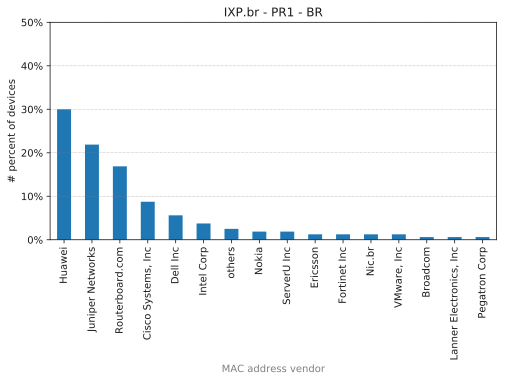

arp.IX-SYD.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.IX-SYD.txt
                                    count  percent
companyName                                       
Cisco Systems, Inc                    139    39.04
Juniper Networks                       98    27.53
Routerboard.com                        30     8.43
Arista Networks                        20     5.62
Brocade Communications Systems Llc     15     4.21
VMware, Inc                            10     2.81
others                                  9     2.53
Intel Corp                              7     1.97
Icann, Iana Department                  6     1.69
Dell Inc                                5     1.40
Fortinet Inc                            4     1.12
Nokia                                   4     1.12
Ubiquiti Networks Inc                   3     0.84
Edgecore Networks Corp                  2     0.56
Extreme Networks, Inc                   2     0.56
Palo Alto Networks                      2     0.56


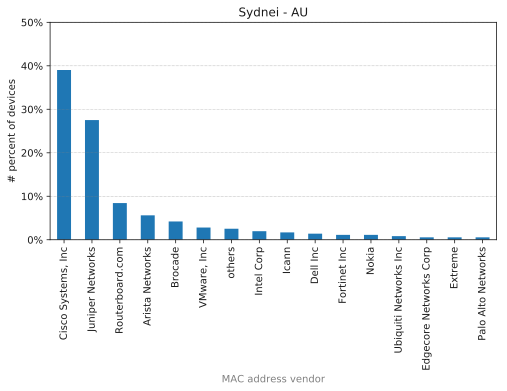

arp.LONAP.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.LONAP.txt
                                    count  percent
companyName                                       
Cisco Systems, Inc                    102    38.20
Juniper Networks                       88    32.96
Arista Networks                        16     5.99
Intel Corp                             12     4.49
Extreme Networks, Inc                   9     3.37
Routerboard.com                         9     3.37
Ieee Registration Authority             5     1.87
Super Micro Computer, Inc               5     1.87
Brocade Communications Systems Llc      4     1.50
others                                  4     1.50
Huawei Tech Co, Ltd                     3     1.12
Silicom, Ltd                            3     1.12
Alcatel-Lucent Ipd                      2     0.75
Mellanox Tech, Inc                      2     0.75
Ubiquiti Networks Inc                   2     0.75
Dell Inc                                1     0.37


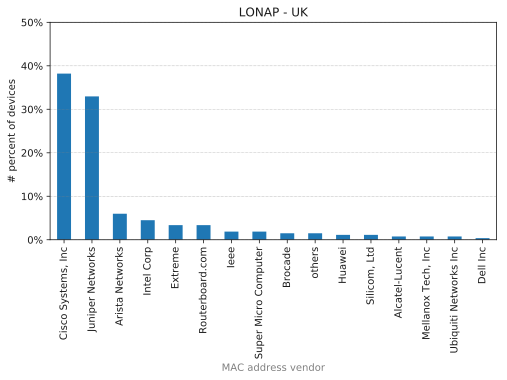

arp.BCIX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.BCIX.txt
                                    count  percent
companyName                                       
Cisco Systems, Inc                     39    43.82
Juniper Networks                       17    19.10
Brocade Communications Systems Llc      9    10.11
Hewlett Packard                         4     4.49
Dell Inc                                3     3.37
Intel Corp                              3     3.37
Mellanox Tech, Inc                      3     3.37
Routerboard.com                         3     3.37
Super Micro Computer, Inc               2     2.25
ASUSTek Computer Inc                    1     1.12
Arista Networks                         1     1.12
Broadcom                                1     1.12
Force10 Networks, Inc                   1     1.12
Huawei Tech Co, Ltd                     1     1.12
VMware, Inc                             1     1.12
others                                  0     0.00


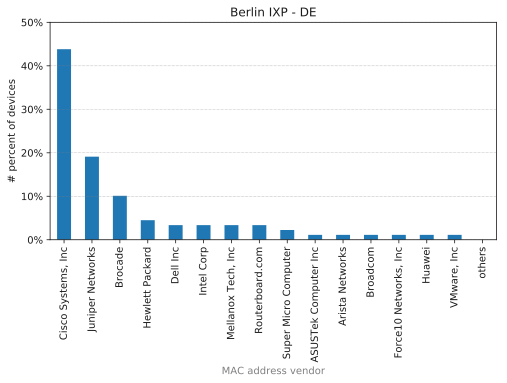

arp.EPIX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.EPIX.txt
                                      count  percent
companyName                                         
Routerboard.com                         184    19.96
Super Micro Computer, Inc               163    17.68
Cisco Systems, Inc                      128    13.88
Intel Corp                              109    11.82
Juniper Networks                         80     8.68
Shenzhen Lianrui Electronics Co, Ltd     57     6.18
others                                   47     5.10
Ericsson                                 34     3.69
Ubiquiti Networks Inc                    32     3.47
Hewlett Packard                          27     2.93
Dell Inc                                 17     1.84
Fujitsu Tech Solutions GmbH              11     1.19
Huawei Tech Co, Ltd                      11     1.19
VMware, Inc                               8     0.87
Arista Networks                           7     0.76
Broadcom                 

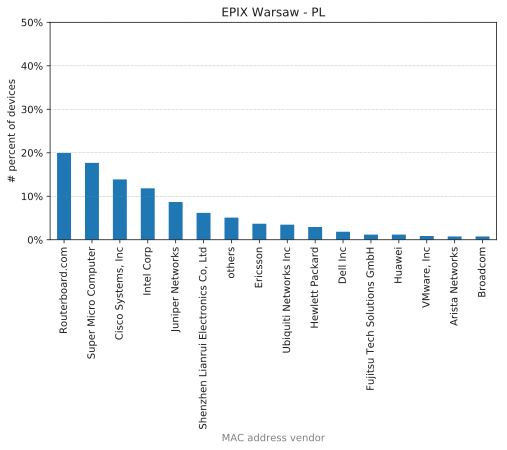

arp.SwissIX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.SwissIX.txt
                                    count  percent
companyName                                       
Cisco Systems, Inc                     85    38.12
Juniper Networks                       44    19.73
Brocade Communications Systems Llc     26    11.66
Routerboard.com                        15     6.73
Extreme Networks, Inc                  10     4.48
Huawei Tech Co, Ltd                     9     4.04
others                                  9     4.04
Lanner Electronics, Inc                 5     2.24
VMware, Inc                             4     1.79
Arista Networks                         3     1.35
Dell Inc                                3     1.35
Nokia                                   3     1.35
Super Micro Computer, Inc               3     1.35
Hewlett Packard Enterprise              2     0.90
Icann, Iana Department                  1     0.45
Qumranet Inc                            1     0.45


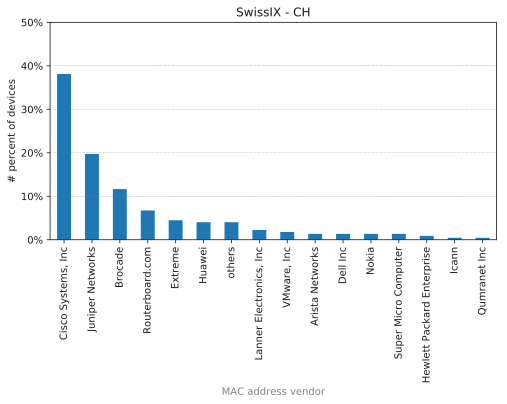

arp-inex.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp-inex.txt-translated
                                      count  percent
companyName                                         
Juniper Networks                         59    30.26
Cisco Systems, Inc                       57    29.23
Routerboard.com                          30    15.38
VMware, Inc                              12     6.15
Arista Networks                          11     5.64
Extreme Networks, Inc                     4     2.05
others                                    4     2.05
Alcatel-Lucent Ipd                        3     1.54
Dell Inc                                  3     1.54
Brocade Communications Systems Llc        2     1.03
Huawei Tech Co, Ltd                       2     1.03
Intel Corp                                2     1.03
Nokia                                     2     1.03
Shenzhen Lianrui Electronics Co, Ltd      2     1.03
Evoc Intelligent Tech Co, Ltd             1     0.51
HotLava System

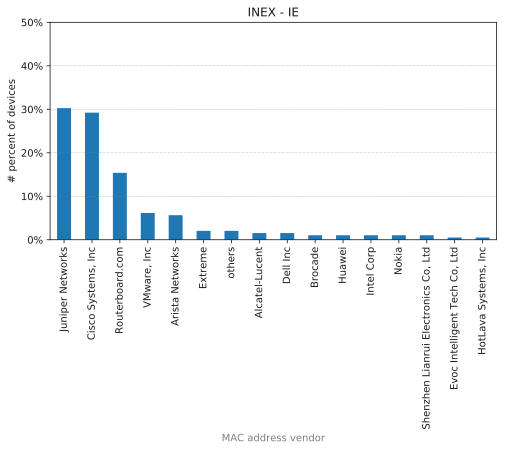

arp.KleyReX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.KleyReX.txt
                                count  percent
companyName                                   
Juniper Networks                   37    26.24
VMware, Inc                        29    20.57
Cisco Systems, Inc                 20    14.18
Routerboard.com                    12     8.51
Super Micro Computer, Inc           9     6.38
others                              8     5.67
Hewlett Packard                     6     4.26
Ubiquiti Networks Inc               6     4.26
Dell Inc                            3     2.13
J125, National Security Agency      3     2.13
ASRock Incorporation                2     1.42
Nokia                               2     1.42
Huawei Tech Co, Ltd                 1     0.71
Ieee Registration Authority         1     0.71
Mellanox Tech, Inc                  1     0.71
Sophos Ltd                          1     0.71


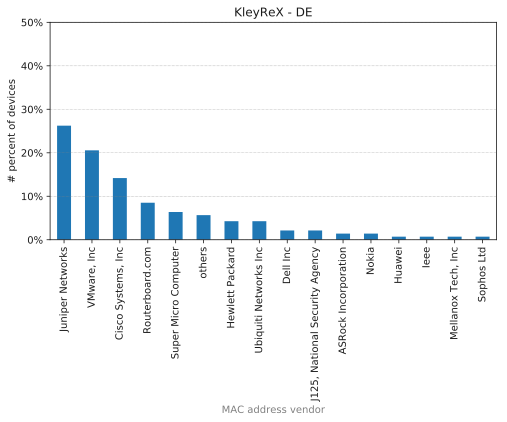

arp.ixp_sp.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.ixp_sp.txt-translated
                                    count  percent
companyName                                       
Routerboard.com                       586    28.90
Juniper Networks                      473    23.32
Huawei Tech Co, Ltd                   472    23.27
Cisco Systems, Inc                    182     8.97
Intel Corp                             98     4.83
others                                 50     2.47
Dell Inc                               32     1.58
Broadcom                               28     1.38
ServerU Inc                            26     1.28
Ubiquiti Networks Inc                  22     1.08
Arista Networks                        19     0.94
Hewlett Packard                        14     0.69
VMware, Inc                             8     0.39
Brocade Communications Systems Llc      7     0.35
Super Micro Computer, Inc               6     0.30
Chelsio Communications                  5     

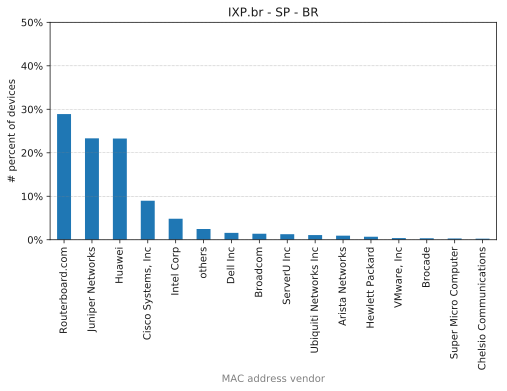

arp.asteroid.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.asteroid.txt-translated
                                    count  percent
companyName                                       
Juniper Networks                       12    44.44
Arista Networks                         4    14.81
Brocade Communications Systems Llc      4    14.81
Cisco Systems, Inc                      2     7.41
Super Micro Computer, Inc               2     7.41
Chelsio Communications                  1     3.70
Nokia                                   1     3.70
Shenzhen Winyao Electronic Ltd          1     3.70
others                                  0     0.00


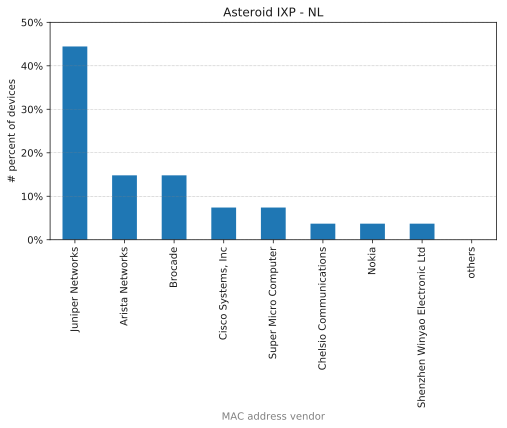

arp.Denver-IX.txt


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.Denver-IX.txt
                                    count  percent
companyName                                       
Cisco Systems, Inc                     21    33.33
Juniper Networks                       18    28.57
Arista Networks                         7    11.11
Routerboard.com                         7    11.11
Brocade Communications Systems Llc      3     4.76
VMware, Inc                             2     3.17
Extreme Networks, Inc                   1     1.59
Intel Corp                              1     1.59
Super Micro Computer, Inc               1     1.59
Ubiquiti Networks Inc                   1     1.59
Xerox Corp                              1     1.59
others                                  0     0.00


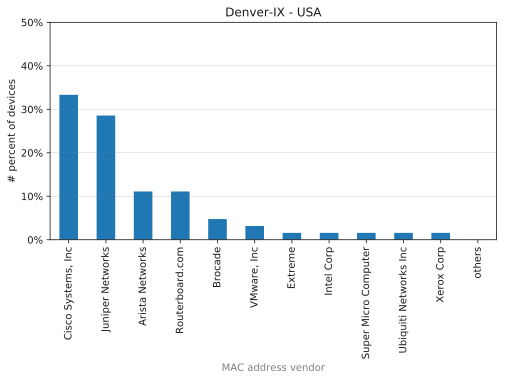

arp.nlix.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.nlix.txt-translated
                                    count  percent
companyName                                       
Juniper Networks                      182    42.13
Cisco Systems, Inc                    108    25.00
Brocade Communications Systems Llc     47    10.88
VMware, Inc                            20     4.63
Huawei Tech Co, Ltd                    12     2.78
Arista Networks                        10     2.31
Nokia                                   9     2.08
Intel Corp                              8     1.85
others                                  8     1.85
Dell Inc                                6     1.39
Hewlett Packard                         6     1.39
Fortinet Inc                            5     1.16
Routerboard.com                         5     1.16
Extreme Networks, Inc                   2     0.46
Ubiquiti Networks Inc                   2     0.46
zte Corp                                2     0.

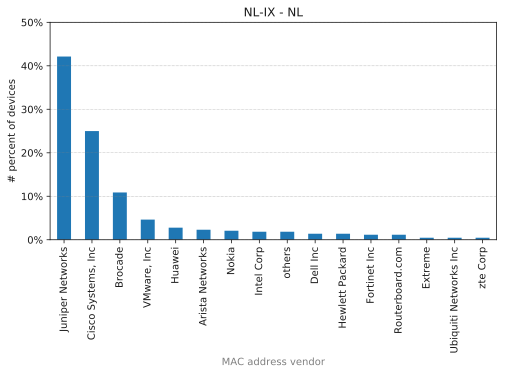

arp.ixp_poa.txt-translated


/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/arp.ixp_poa.txt-translated
                                                    count  percent
companyName                                                       
Routerboard.com                                        63    34.62
Huawei Tech Co, Ltd                                    35    19.23
Juniper Networks                                       34    18.68
Cisco Systems, Inc                                     22    12.09
Dell Inc                                                4     2.20
Intel Corp                                              4     2.20
Brocade Communications Systems Llc                      3     1.65
Nic.br- Nucleo de Informacao e Coordenacao do P...      3     1.65
others                                                  3     1.65
Arista Networks                                         2     1.10
Broadcom                                                2     1.10
Hewlett Packard                          

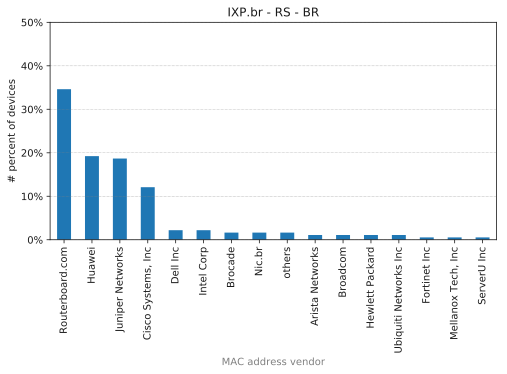

In [15]:
dataset_dir = "/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/new/"
df_all = pd.DataFrame()
for file in os.listdir(dataset_dir):
    if re.match(r"arp.*", file):
        print (file)
        df = pd.read_csv(dataset_dir+file, low_memory=False, index_col=None, sep=";",names=["mac", 'vendor'])
        df['mac'] = df['mac'].str.upper() 
        df['mac']  = df.mac.str.extract('([0-9A-F]{2}:[0-9A-F]{2}:[0-9A-F]{2})')
        df["mac"] = df.mac.str.split(":").str[:3] 
        df["mac"] = df["mac"].str.join(":")
        df = pd.merge(df,df_mac_all, left_on=["mac"],right_on=["oui"])
        df = df[['mac','companyName','countryCode']]
        df_top = top_n_dataframe(15, df.companyName)
        
        title = ixp_name_rewrite(file)        
        df_top['ixp'] = title
        header = "<h2 style=\"color:#069\" >{} </h2>".format(title)
        display(HTML(header))
        print (dataset_dir+file)
        print (df_top.iloc[:,:2])
        df_top = df_top.reset_index()
        df_top.loc[df_top.companyName.str.contains("Brocade"),'companyName'] = "Brocade"
        df_top.loc[df_top.companyName.str.contains("Huawei"),'companyName'] = "Huawei"
        df_top.loc[df_top.companyName.str.contains("Icann"),'companyName'] = "Icann"
        df_top.loc[df_top.companyName.str.contains("Super Micro Computer, Inc"),'companyName'] = "Super Micro Computer"
        df_top.loc[df_top.companyName.str.contains("Ieee"),'companyName'] = "Ieee"
        df_top.loc[df_top.companyName.str.contains("Extreme"),'companyName'] = "Extreme"
        df_top.loc[df_top.companyName.str.contains("Nic"),'companyName'] = "Nic.br"
        df_top.loc[df_top.companyName.str.contains("Alcatel"),'companyName'] = "Alcatel-Lucent"

        df_top = df_top.set_index("companyName")
        plot_graph(df_top['percent'],title)
        df_all = pd.concat([df_top.reset_index(),df_all], ignore_index=True)
#         break

# Heatmap

In [17]:
# df_all..unique().tolist()
data = pd.pivot_table(df_all, index = ['companyName'], columns = 'ixp', aggfunc='mean', values = 'percent').fillna(0)
df_all.ixp.unique().tolist()

['IXP.br - RS - BR',
 'NL-IX - NL',
 'Denver-IX - USA',
 'Asteroid IXP - NL',
 'IXP.br - SP - BR',
 'KleyReX - DE',
 'INEX - IE',
 'SwissIX - CH',
 'EPIX Warsaw - PL',
 'Berlin IXP - DE',
 'LONAP - UK',
 'Sydnei - AU',
 'IXP.br - PR1 - BR',
 'Speed-IX - NL',
 'NAPAfrica - All Locations',
 'IXP.br - PR2 - BR',
 'France-IX - FR',
 'DE-CIX - All Locations',
 'Greek IXP - GR',
 'LINX - UK',
 'FLIX - Florida - USA',
 'arp.BKNIX.txt',
 'MSK-IX - Moscow - RU',
 'STHIX - Stockholm - SE']

### Heatmap vendors per ASN

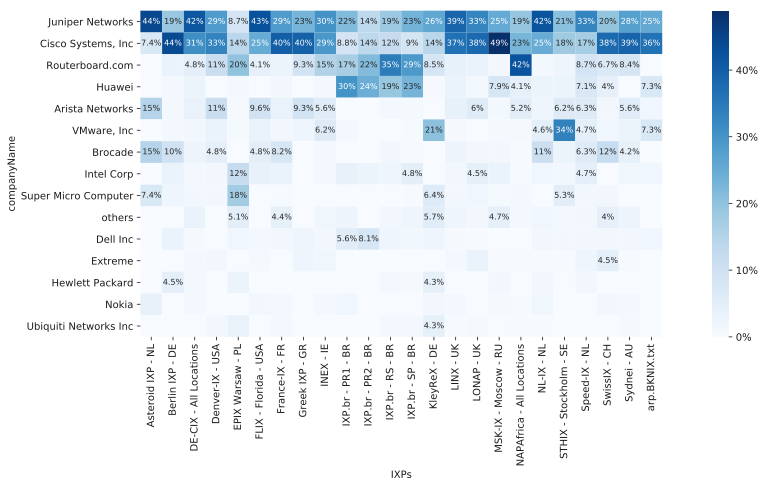

In [18]:
data = pd.pivot_table(df_all, index = ['companyName'], columns = 'ixp', aggfunc='mean', values = 'percent').fillna(0)
# # top 15
data["sum"] = data.sum(axis=1)
data = data.sort_values(by='sum', ascending=False)[:15]
del data['sum']

plt.figure(figsize=(18, 6))
ax = sns.heatmap(data[:15],
                 cmap="Blues",robust=False, 
                 cbar=True,
                 cbar_kws={'format': '%.0f%%'},
                 annot=True,
                 square=True,
                 annot_kws={'size':8},
                )
for t in ax.texts: 
    value = t.get_text()
    if (float(value) <4):
        t.set_text("")
    else:
        t.set_text(t.get_text() + "%")
ax.set_xlabel('IXPs');
plt.savefig('heatmap.svg', bbox_inches='tight')

### Heatmap vendors per CC

In [19]:
df_mac_all.head(1)

,oui,isPrivate,companyName,companyAddress,countryCode,assignmentBlockSize,dateCreated,dateUpdated
0,00:E0:0D,0,Radiant Systems,1000 ALDERMAN DR. ALPHARETTA GA 30202 US,US,MA-L,1980-01-01,2015-09-27


In [27]:
dataset_dir = "./dataset/new/"
df_all = pd.DataFrame()
for file in os.listdir(dataset_dir):
    if re.match(r"arp.*", file):
        df = pd.read_csv(dataset_dir+file, low_memory=False, index_col=None, sep=";",names=["mac", 'vendor'])
        df['mac'] = df['mac'].str.upper() 
        df['mac']  = df.mac.str.extract('([0-9A-F]{2}:[0-9A-F]{2}:[0-9A-F]{2})')
        df["mac"] = df.mac.str.split(":").str[:3] 
        df["mac"] = df["mac"].str.join(":")
        df = pd.merge(df,df_mac_all, left_on=["mac"],right_on=["oui"])
        df = df[['mac','companyName','countryCode']]
        df_top = top_n_dataframe(15, df.countryCode)
        
        title = ixp_name_rewrite(file)        
        df_top['ixp'] = title
        header = "<h2 style=\"color:#069\" >{} </h2>".format(title)
        display(HTML(header))
        print (dataset_dir+file)
        print (df_top.iloc[:,:2])
#         plot_graph(df_top['percent'],title)
        df_all = pd.concat([df_top.reset_index(),df_all], ignore_index=True)
#         break

./dataset/new/arp.STHIX.txt
             count  percent
countryCode                
US             194    93.27
CN               6     2.88
LV               5     2.40
MY               3     1.44
others           0     0.00


./dataset/new/arp.msk-ix.txt-translated
             count  percent
countryCode                
US             264    83.28
CN              29     9.15
MY               8     2.52
CA               6     1.89
LV               5     1.58
CH               1     0.32
IL               1     0.32
JP               1     0.32
NZ               1     0.32
RU               1     0.32
others           0     0.00


./dataset/new/arp.BKNIX.txt
             count  percent
countryCode                
US              50    90.91
CN               4     7.27
MY               1     1.82
others           0     0.00


./dataset/new/arp.flix.txt-translated
             count  percent
countryCode                
US             284    90.45
LV              13     4.14
MY              12     3.82
CA               5     1.59
others           0     0.00


./dataset/new/arp.LINX.txt
             count  percent
countryCode                
US            1258    88.34
LV              55     3.86
CN              45     3.16
CA              29     2.04
MY              23     1.62
TW              10     0.70
GB               2     0.14
IT               2     0.14
others           0     0.00


./dataset/new/arp.GR-IX.txt
             count  percent
countryCode                
US              38    88.37
LV               4     9.30
TW               1     2.33
others           0     0.00


./dataset/new/arp.decix.txt-translated
             count  percent
countryCode                
US            7387    88.29
LV             398     4.76
CN             280     3.35
CA             136     1.63
MY              94     1.12
SE              26     0.31
TW              20     0.24
DE               8     0.10
IT               8     0.10
JP               6     0.07
FR               2     0.02
IL               2     0.02
others           0     0.00


./dataset/new/arp.France-IX.txt
             count  percent
countryCode                
US             321    87.47
CN              12     3.27
LV              11     3.00
MY              11     3.00
CA               5     1.36
TW               3     0.82
CH               1     0.27
DK               1     0.27
IL               1     0.27
IT               1     0.27
others           0     0.00


./dataset/new/arp.ixp_londrina.txt-translated
             count  percent
countryCode                
US              17    45.95
CN               9    24.32
LV               8    21.62
BR               1     2.70
CA               1     2.70
MY               1     2.70
others           0     0.00


./dataset/new/arp.NAPAfrica.txt
             count  percent
countryCode                
US             393    52.40
LV             317    42.27
CN              32     4.27
CA               4     0.53
MY               3     0.40
TW               1     0.13
others           0     0.00


./dataset/new/arp.speed.txt-translated
             count  percent
countryCode                
US             100    78.74
LV              11     8.66
CN               9     7.09
MY               6     4.72
HK               1     0.79
others           0     0.00


./dataset/new/arp.ixp_pr.txt-translated
             count  percent
countryCode                
US              71    44.38
CN              49    30.63
LV              27    16.88
MY               6     3.75
CA               3     1.88
BR               2     1.25
TW               2     1.25
others           0     0.00


./dataset/new/arp.IX-SYD.txt
             count  percent
countryCode                
US             309    86.80
LV              30     8.43
MY               7     1.97
CA               4     1.12
TW               3     0.84
CN               2     0.56
FR               1     0.28
others           0     0.00


./dataset/new/arp.LONAP.txt
             count  percent
countryCode                
US             238    89.14
MY              10     3.75
LV               9     3.37
CA               3     1.12
CN               3     1.12
IL               3     1.12
GB               1     0.37
others           0     0.00


./dataset/new/arp.BCIX.txt
             count  percent
countryCode                
US              83    93.26
LV               3     3.37
CN               1     1.12
MY               1     1.12
TW               1     1.12
others           0     0.00


./dataset/new/arp.EPIX.txt
             count  percent
countryCode                
US             531    57.59
LV             184    19.96
MY             106    11.50
CN              71     7.70
DE              11     1.19
TW               9     0.98
CA               5     0.54
SE               2     0.22
CH               1     0.11
GB               1     0.11
IL               1     0.11
others           0     0.00


./dataset/new/arp.SwissIX.txt
             count  percent
countryCode                
US             185    82.96
LV              15     6.73
CN              11     4.93
TW               7     3.14
CA               3     1.35
CH               1     0.45
MY               1     0.45
others           0     0.00


./dataset/new/arp-inex.txt-translated
             count  percent
countryCode                
US             153    78.46
LV              30    15.38
CA               5     2.56
CN               5     2.56
MY               2     1.03
others           0     0.00


./dataset/new/arp.KleyReX.txt
             count  percent
countryCode                
US             120    85.11
LV              12     8.51
CA               2     1.42
TW               2     1.42
CN               1     0.71
DE               1     0.71
GB               1     0.71
JP               1     0.71
MY               1     0.71
others           0     0.00


./dataset/new/arp.ixp_sp.txt-translated
             count  percent
countryCode                
US             849    41.86
LV             586    28.90
CN             476    23.47
MY              95     4.68
TW              12     0.59
BR               5     0.25
CA               2     0.10
IL               2     0.10
SG               1     0.05
others           0     0.00


./dataset/new/arp.asteroid.txt-translated
             count  percent
countryCode                
US              25    92.59
CA               1     3.70
CN               1     3.70
others           0     0.00


./dataset/new/arp.Denver-IX.txt
             count  percent
countryCode                
US              56    88.89
LV               7    11.11
others           0     0.00


./dataset/new/arp.nlix.txt-translated
             count  percent
countryCode                
US             393    90.97
CN              15     3.47
CA               9     2.08
MY               7     1.62
LV               5     1.16
IL               2     0.46
TW               1     0.23
others           0     0.00


./dataset/new/arp.ixp_poa.txt-translated
             count  percent
countryCode                
US              75    41.21
LV              63    34.62
CN              35    19.23
MY               4     2.20
BR               3     1.65
CA               1     0.55
TW               1     0.55
others           0     0.00


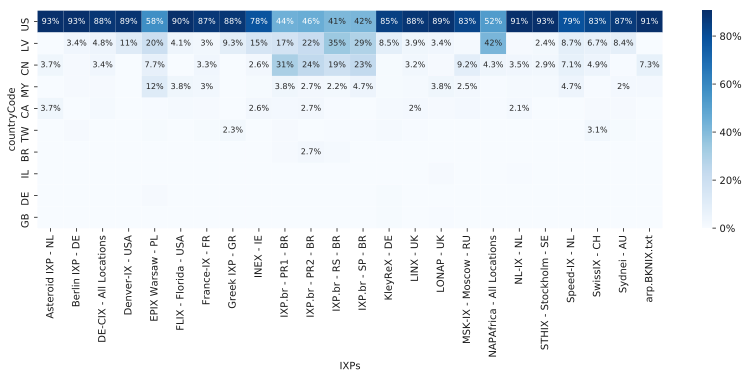

In [28]:
data = pd.pivot_table(df_all, index = ['countryCode'], columns = 'ixp', aggfunc='mean', values = 'percent').fillna(0)
# # top 15
data["sum"] = data.sum(axis=1)
data = data.sort_values(by='sum', ascending=False)[:10]
del data['sum']

plt.figure(figsize=(14, 4))
ax = sns.heatmap(data[:10],
                 cmap="Blues",robust=True, 
                 cbar=True,
                 cbar_kws={'format': '%.0f%%'},
                 annot=True,
                 square=False,
                 annot_kws={'size':8},
                )
for t in ax.texts: 
    value = t.get_text()
    if (float(value) <2):
        t.set_text("")
    else:
        t.set_text(t.get_text() + "%")
ax.set_xlabel('IXPs');
plt.savefig('heatmap-cc.png', bbox_inches='tight')

# AS CONE SIZE

/Users/joaoceron/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


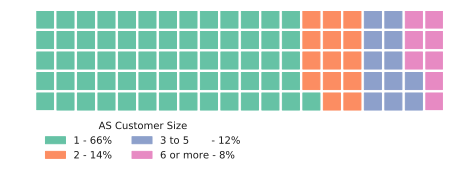

In [38]:
# creation of a dataframe 
# from waffle import main

data ={'cat': ['1 - 66%', '2 - 14%', 
                 '3 to 5       - 12%', '6 or more - 8%'], 
       'cone': [66, 14,12, 8] 
     } 
  
df = pd.DataFrame(data) 
# To plot the waffle Chart 
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 5, 
    values = df.cone, 
    labels = list(df.cat),
        legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.6), 
                'ncol': len(data), 'framealpha': 0, 
                'frameon':True,
                'title': 'AS Customer Size'}
) 
# plt.legend(loc='lower left')


In [39]:
df = pd.read_csv('./dataset/asrank/ases.ixp.sp.br.csv').fillna(0)
len(df)

2095

In [40]:
df_class = pd.read_csv('./dataset/caida-as-classification/caida-as-classification.txt.gz',sep="|").fillna(0)
df_class.head(1)

,as,meta,class
0,1,CAIDA_class,Transit/Access


In [41]:
df_merge = pd.merge(df,df_class, left_on=["as"],right_on=["as"])
df_merge.head(1)

,as,meta,class
0,42,CAIDA_class,Transit/Access


In [42]:
df_square = df_merge['class'].value_counts(normalize=True).mul(100).round().reset_index()
df_square.head()

,index,class
0,Transit/Access,93.0
1,Content,4.0
2,Enterprise,3.0


In [43]:
df_merge['class'].value_counts(normalize=True)

Transit/Access    0.929790
Content           0.044856
Enterprise        0.025353
Name: class, dtype: float64

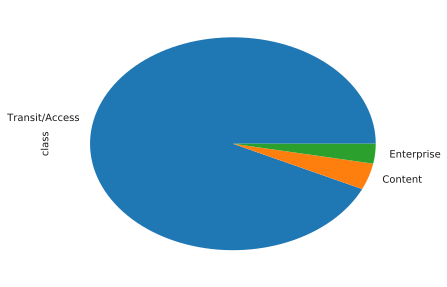

In [44]:
df_merge['class'].value_counts(normalize=True).mul(100).round().plot(kind="pie")


In [45]:
# df_merge['class'].tolist()
df_merge.head(1)

,as,meta,class
0,42,CAIDA_class,Transit/Access


In [46]:
# df_merge['index'].tolist()
df_merge['class'].unique().tolist()

['Transit/Access', 'Content', 'Enterprise']

In [47]:
df_merge['class'].value_counts(normalize=True).mul(100).round(2)

Transit/Access    92.98
Content            4.49
Enterprise         2.54
Name: class, dtype: float64

(0.0, 100.0, 0.0, 100.0)

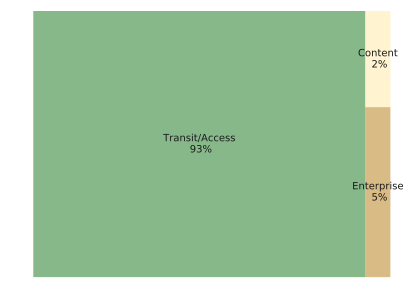

In [48]:
import squarify

volume = df_merge['class'].value_counts(normalize=True).mul(100).round(2).tolist()
labels = ['Transit/Access\n 93%', 'Enterprise\n 5%', 'Content\n 2%']

color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.5)
plt.axis('off')


In [49]:
df_ = df_merge['class'].value_counts(normalize=True).mul(100).round().reset_index()
df_.set_index('index',inplace=True)
df_

,class
index,
Transit/Access,93.0
Content,4.0
Enterprise,3.0


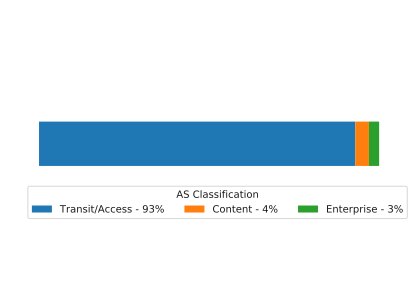

In [50]:
fig, ax = plt.subplots()
ax.axis("off")
df_.T.plot.barh(stacked=True,ax=ax, width=0.1)
ax.legend(frameon=True, loc='lower center', ncol=3, 
          bbox_to_anchor = (0.5, 0.2),
          title= "AS Classification")
handles, labels = ax.get_legend_handles_labels()
labels = ['Transit/Access - 93%', 'Content - 4%', 'Enterprise - 3%']

ax.legend(handles,labels,frameon=True, loc='lower center', ncol=3, 
          bbox_to_anchor = (0.5, 0.2),
          title= "AS Classification")


In [51]:
df_ = df_merge['class'].value_counts(normalize=False).mul(1).round().reset_index()
df_

,index,class
0,Transit/Access,1907
1,Content,92
2,Enterprise,52


## AS classified as Content

In [52]:
# df_[df_.ixp.str.contains(".*IXP.*SP.*")] 
df4 = df_merge[df_merge['class'].str.contains(".*Content.*")]
len(df4['as'].tolist())

92

In [53]:
df3 = pd.read_csv("./dataset/asrank/asn.cc.csv", sep=" ; ")
df3

/Users/joaoceron/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,as,cc,date,name,te
0,42,US,arin,2001-05-16,WOODYNET-1; US
1,1149,NL,ripencc,1993-09-01,SURFNET-AS Tijdelijk uitgeleend aan UTWENTE vo...
2,1251,BR,lacnic,1999-11-12,FUNDACAO DE AMPARO A PESQUISA DO ESTADO SAO PA...
3,1828,US,arin,2009-08-27,UNITAS; US
4,1916,BR,lacnic,1999-11-16,Associacao Rede Nacional de Ensino e Pesquisa; BR
...,...,...,...,...,...
2090,271328,BR,lacnic,2020-09-10,RL QUEIROZ DA SILVA PROVEDOR DE INTERNET; BR
2091,394354,CA,arin,2015-08-19,CIRA-REGISTRY; CA
2092,394957,US,arin,2016-03-01,ZADARA-01; US
2093,397192,US,arin,2018-09-21,HTUL-CDN-01; US


In [54]:
df3.columns

Index(['as', 'cc', 'date', 'name', 'te'], dtype='object')

In [55]:
df3['cc'].value_counts(normalize=False)

BR    1956
US      63
NL       5
EU       3
GB       3
PY       3
ZA       2
CN       2
CO       2
AT       2
SG       2
AR       2
UY       2
CZ       1
DE       1
IT       1
HK       1
CA       1
BG       1
AO       1
PL       1
CL       1
PA       1
ES       1
MZ       1
SE       1
RU       1
FR       1
Name: cc, dtype: int64

In [56]:
top_n_dataframe(26,df3['cc'])

,count,percent
cc,,
BR,1956,94.86
US,63,3.06
NL,5,0.24
GB,3,0.15
EU,3,0.15
PY,3,0.15
ZA,2,0.10
UY,2,0.10
SG,2,0.10


In [58]:
# df3[df3['cc ']=="US"]